A convolutional neural network (CNN) is a type of artificial neural network used primarily for image recognition and processing, due to its ability to recognize patterns in images. A CNN is a powerful tool but requires millions of labelled data points for training.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_test.shape

(10000, 1)

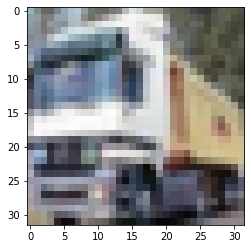

In [7]:
plt.imshow(X_train[1])

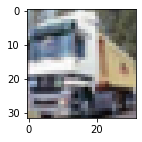

In [8]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[1])

In [9]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [12]:
classes[9]

'truck'

In [13]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

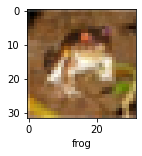

In [14]:
plot_sample(X_train,y_train,0)

In [15]:
# Normalizaition
X_train = X_train/255
X_test = X_test/255

In [16]:
# this will preform poorly on this dataset
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(
    optimizer='SGD', 
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy'],
)

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 71s 45ms/step - loss: 1.8085 - accuracy: 0.3576
Epoch 2/5
 857/1563 [===============>..............] - ETA: 33s - loss: 1.6410 - accuracy: 0.4204

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test,y_pred_classes))

313/313 [==============================] - 5s 15ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.31      0.44      1000
           1       0.53      0.65      0.58      1000
           2       0.38      0.37      0.37      1000
           3       0.28      0.58      0.38      1000
           4       0.53      0.29      0.38      1000
           5       0.46      0.26      0.33      1000
           6       0.58      0.45      0.51      1000
           7       0.65      0.43      0.51      1000
           8       0.68      0.38      0.49      1000
           9       0.34      0.75      0.46      1000

    accuracy                           0.45     10000
   macro avg       0.52      0.45      0.45     10000
weighted avg       0.52      0.45      0.45     10000



In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [ ]:
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 39s 24ms/step - loss: 1.4807 - accuracy: 0.4673
Epoch 2/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.1125 - accuracy: 0.6079
Epoch 3/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9932 - accuracy: 0.6522
Epoch 4/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9091 - accuracy: 0.6854
Epoch 5/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.8437 - accuracy: 0.7068
Epoch 6/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7925 - accuracy: 0.7235
Epoch 7/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7425 - accuracy: 0.7409
Epoch 8/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.7071 - accuracy: 0.7522
Epoch 9/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.6663 - accuracy: 0.7672
Epoch 10/10
1563/1563 [==============================] - 50s 32m

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.9422 - accuracy: 0.6924


[0.9421855211257935, 0.6923999786376953]

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

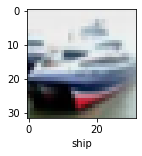

In [ ]:
plot_sample(X_test, y_test, 1)

In [ ]:
y_Pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 10ms/step


array([[0.1818681 , 0.73019034, 0.7453078 , 0.9213664 , 0.32649827,
        0.8032316 , 0.5964112 , 0.0286636 , 0.42030606, 0.27013698],
       [0.5514816 , 0.98719215, 0.30053958, 0.37711373, 0.06300867,
        0.05965856, 0.02776886, 0.05987554, 0.9121465 , 0.99592435],
       [0.8553673 , 0.97067595, 0.36955926, 0.31206405, 0.1222784 ,
        0.10463437, 0.00454515, 0.11798012, 0.9368089 , 0.9866531 ],
       [0.7169764 , 0.8675882 , 0.54915977, 0.49799177, 0.32949582,
        0.23428138, 0.01549851, 0.4898927 , 0.6677043 , 0.8120041 ],
       [0.09571166, 0.12331737, 0.8236622 , 0.7830227 , 0.9372688 ,
        0.7305446 , 0.8549796 , 0.29675293, 0.2360307 , 0.09299983]],
      dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 9, 9, 1, 4]

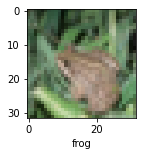

In [ ]:
plot_sample(X_test, y_test, 4)

In [ ]:
classes[4]

'deer'